# Prevendo o preço do aluguel no Rio de Janeiro
- A empresa HashMoveis contratou para ajudar a decidir em quais imóveis poderá investir
  - Prever qual seria o aluguel desse imóvel pelo airbnb e investir nos imóveis que irão trazer um rápido retorno de investimento

Principais etapas do projeto:
1. Definição do problema
2. Entendimento e tratamento de dados
3. Análise Exploratória
4. Tratamento dos Dados
5. Definição do modelo
6. Modelo em produção

# Definição do Problema
- Para entender o problemam algumas perguntas são fundamentais:
 - De forma direta: "Qual o problema que eu quero resolver?"
 - Quais são as minhas métricas de sucesso?
 - Qual o prazo desejado para esse projeto?
 - Quem são os interessados nesse resultado?
 - Quais são os **dados** disponíveis

# Entendimento e tratamento dos dados

In [1]:
# Importando a base de dados
import pandas as pd

In [2]:
# Importando uma base de dados utilizando o pandas
dados = pd.read_csv("quinto_andar_transformed_data.csv")

**Importante analisar as informações dos dados .info()**

In [3]:
# Visualizando as informações da base de dados
#type(dados)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


In [4]:
# Verificando valores nulos
dados.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         7
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [53]:
#Filtrando esses valores
dados[dados.condominio.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
987,https://www.quintoandar.com.br/imovel/89288689...,Bela Vista,2960.0,NaN,125.0,49.0,59.0,3193.0,100.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
1391,https://www.quintoandar.com.br/imovel/89310205...,Perdizes,5200.0,NaN,1030.0,86.0,104.0,6420.0,220.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0
1527,https://www.quintoandar.com.br/imovel/89310896...,Aclimação,3000.0,NaN,158.0,50.0,60.0,3268.0,90.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0
1801,https://www.quintoandar.com.br/imovel/89284189...,Ipiranga,2600.0,NaN,100.0,43.0,52.0,2795.0,100.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
2287,https://www.quintoandar.com.br/imovel/89288795...,Ipiranga,1000.0,NaN,80.0,17.0,20.0,1117.0,25.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0
2387,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2751,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# Podemos, por exemplo, acessar esses anúncios
dados.url[2287]

'https://www.quintoandar.com.br/imovel/892887955?house_tags=rentPriceDecreased&search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A929%2C%22personalization%22%3Atrue%7D&search_id=%22d29c9fa4f19011eb8c20e2cf81d20c5e%22&from_route=%22search_results%22'

In [54]:
#Selecionando apenas esse coluna
dados.loc[dados.condominio.isnull(), 'condominio']

987    NaN
1391   NaN
1527   NaN
1801   NaN
2287   NaN
2387   NaN
2751   NaN
Name: condominio, dtype: float64

In [55]:
# Substituindo esses valores por 0
dados.loc[dados.condominio.isnull(), 'condominio'] = 0

In [32]:
# Verificando novamente os valores nulos
dados.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         0
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [56]:
# Fazendo o mesmo processo para iptu
#Filtrando esses valores nulos
dados[dados.iptu.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
321,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
580,https://www.quintoandar.com.br/imovel/89276781...,Aclimação,1500.0,477.0,NaN,20.0,30.0,2027.0,67.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0
732,https://www.quintoandar.com.br/imovel/89277791...,Vila Olímpia,3700.0,0.0,NaN,47.0,74.0,3821.0,60.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0
1348,https://www.quintoandar.com.br/imovel/89277231...,Consolação,2696.0,1033.0,NaN,35.0,53.0,3882.0,88.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
1486,https://www.quintoandar.com.br/imovel/89279154...,Jardim Paulista,6750.0,1400.0,NaN,86.0,135.0,8371.0,90.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0
1709,https://www.quintoandar.com.br/imovel/89281155...,Aclimação,3000.0,1100.0,NaN,39.0,60.0,4199.0,100.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
2209,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
2659,https://www.quintoandar.com.br/imovel/89279454...,Bela Vista,906.0,267.0,NaN,12.0,18.0,1203.0,27.0,1.0,1.0,0.0,14.0,0.0,0.0,1.0


In [57]:
dados.url[580]

'https://www.quintoandar.com.br/imovel/892767819?house_tags=rentPriceDecreased&search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A1205%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

In [58]:
# Verificando quantas linhas temos nulas na base
dados[dados.iptu.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
321,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
580,https://www.quintoandar.com.br/imovel/89276781...,Aclimação,1500.0,477.0,NaN,20.0,30.0,2027.0,67.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0
732,https://www.quintoandar.com.br/imovel/89277791...,Vila Olímpia,3700.0,0.0,NaN,47.0,74.0,3821.0,60.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0
1348,https://www.quintoandar.com.br/imovel/89277231...,Consolação,2696.0,1033.0,NaN,35.0,53.0,3882.0,88.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
1486,https://www.quintoandar.com.br/imovel/89279154...,Jardim Paulista,6750.0,1400.0,NaN,86.0,135.0,8371.0,90.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0
1709,https://www.quintoandar.com.br/imovel/89281155...,Aclimação,3000.0,1100.0,NaN,39.0,60.0,4199.0,100.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
2209,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
2659,https://www.quintoandar.com.br/imovel/89279454...,Bela Vista,906.0,267.0,NaN,12.0,18.0,1203.0,27.0,1.0,1.0,0.0,14.0,0.0,0.0,1.0


In [59]:
# Podemos excluir essas linhas que estão sem valor de iptu
dados = dados.dropna(axis=0)

In [60]:
# Verificando quantas linhas ficamos na base
dados.shape

(2767, 16)

In [61]:
# Para garantir que não temos valores vazios
dados.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         0
iptu               0
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

**O que é a primeira coluna?**

Eliminando as colunas desnecessárias

In [62]:
# Selecionando a coluna especifica da base
dados.url

0       https://www.quintoandar.com.br/imovel/89332996...
1       https://www.quintoandar.com.br/imovel/89334069...
2       https://www.quintoandar.com.br/imovel/89333859...
3       https://www.quintoandar.com.br/imovel/89337065...
4       https://www.quintoandar.com.br/imovel/89337700...
                              ...                        
2770    https://www.quintoandar.com.br/imovel/89282425...
2771    https://www.quintoandar.com.br/imovel/89336040...
2772    https://www.quintoandar.com.br/imovel/89292613...
2773    https://www.quintoandar.com.br/imovel/89336592...
2774    https://www.quintoandar.com.br/imovel/89294786...
Name: url, Length: 2767, dtype: object

In [63]:
# Eliminando essa coluna
dados = dados.drop('url', axis=1)
display(dados)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
2771,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0
2772,Belém,1350.0,281.0,0.0,18.0,27.0,1676.0,32.0,1.0,1.0,0.0,8.0,1.0,0.0,0.0
2773,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0


## Análise Exploratória de Dados
- Nessa etapa, vamos explorar nossa base

In [65]:
# Relembrando a visualização da base
dados.head(3)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0


**Muito importante ver o resumo estatístico da base de dados (.describe())**

In [66]:
# Entendendo os dados estatísticos
dados.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
mean,2276.430430,596.070473,283.561980,29.923021,45.325985,3232.463679,63.759668,1.593784,1.398265,0.627033,5.924828,0.775208,0.202024,0.733647
std,1327.758115,430.433379,9424.657082,17.660109,26.584522,9600.842536,38.680371,0.748924,0.686907,0.674153,5.000881,0.417521,0.401582,0.442131
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,330.000000,0.000000,18.000000,28.000000,1876.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,1950.000000,520.000000,55.000000,26.000000,39.000000,2615.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,2735.000000,800.000000,140.000000,36.000000,54.000000,3751.000000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000
max,11250.000000,3300.000000,495800.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,43.000000,1.000000,1.000000,1.000000


In [67]:
# Somando todos os valores de aluguel
dados.aluguel.sum()

6298883.0

In [68]:
# Contando a quantidade de valores
dados.aluguel.count()

2767

In [69]:
dados.aluguel.sum()/dados.aluguel.count()

2276.4304300686663

In [70]:
# Calculando a media (mean), desvio padrão(std), mínimo (min) e máximo (máx)
dados.aluguel.max()

11250.0

In [98]:
dados.aluguel.median()

1950.0

In [73]:
# Contando o número de registros antes e depois de 1950
dados[dados.aluguel >= 1950]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0
12,Barra Funda,2500.0,670.0,130.0,32.0,50.0,3382.0,66.0,2.0,2.0,1.0,9.0,1.0,0.0,1.0
13,Santa Cecília,2600.0,0.0,232.0,43.0,52.0,2927.0,99.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0
15,Jardim Paulista,2300.0,395.0,40.0,30.0,46.0,2811.0,38.0,1.0,1.0,0.0,16.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,Bela Vista,1950.0,440.0,0.0,25.0,39.0,2454.0,48.0,1.0,1.0,0.0,8.0,1.0,0.0,1.0
2765,Consolação,2400.0,380.0,0.0,31.0,48.0,2859.0,55.0,1.0,1.0,0.0,9.0,1.0,1.0,1.0
2767,Vila Nova Conceição,3090.0,900.0,184.0,40.0,61.0,4275.0,85.0,2.0,2.0,1.0,12.0,1.0,0.0,0.0
2770,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0


In [74]:
# Verificando 75%
dados.aluguel.quantile(0.75)

2735.0

<AxesSubplot:>

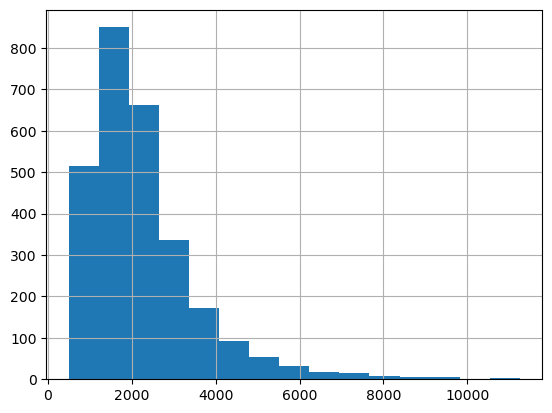

In [89]:
# Plotando um histograma
dados.aluguel.hist(bins = 15)

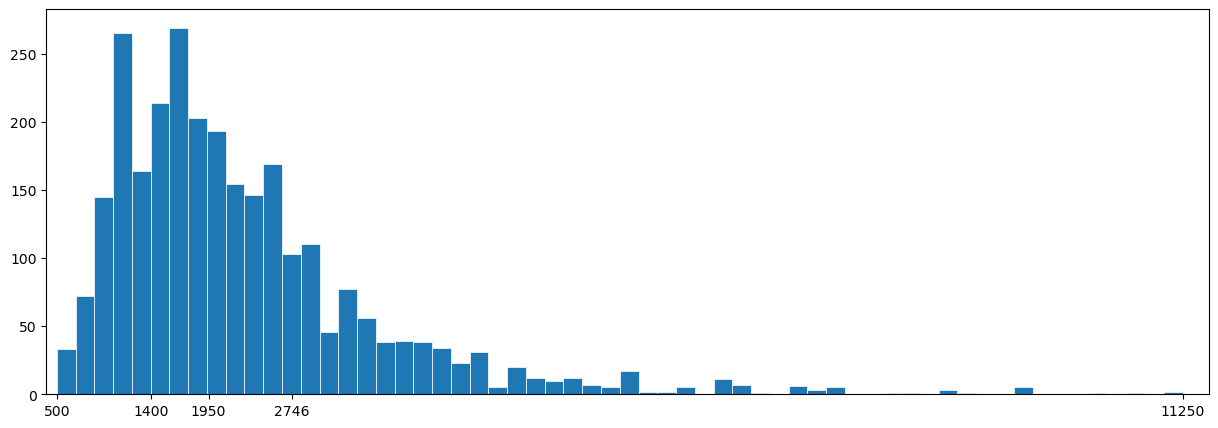

In [95]:
# Melhorando a plotagem do gráfico
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
ax.hist(dados.aluguel,bins=60, linewidth =0.5, edgecolor="white")
ax.set(xlim=(400, 11500), xticks=[500,1400,1950,2746.5,11250])
plt.show()

In [93]:
# Podemos verificar quais os intervalos e números de valores em cada faixa
import numpy as np
np.histogram(dados.aluguel, bins=60)

(array([ 33,  72, 145, 265, 164, 214, 269, 203, 193, 154, 146, 169, 103,
        110,  46,  77,  56,  38,  39,  38,  34,  23,  31,   5,  20,  12,
         10,  12,   7,   5,  17,   2,   2,   5,   0,  11,   7,   1,   0,
          6,   3,   5,   0,   0,   1,   1,   0,   3,   1,   0,   0,   5,
          0,   0,   0,   1,   0,   1,   0,   2], dtype=int64),
 array([  500.        ,   679.16666667,   858.33333333,  1037.5       ,
         1216.66666667,  1395.83333333,  1575.        ,  1754.16666667,
         1933.33333333,  2112.5       ,  2291.66666667,  2470.83333333,
         2650.        ,  2829.16666667,  3008.33333333,  3187.5       ,
         3366.66666667,  3545.83333333,  3725.        ,  3904.16666667,
         4083.33333333,  4262.5       ,  4441.66666667,  4620.83333333,
         4800.        ,  4979.16666667,  5158.33333333,  5337.5       ,
         5516.66666667,  5695.83333333,  5875.        ,  6054.16666667,
         6233.33333333,  6412.5       ,  6591.66666667,  6770.8333333

<AxesSubplot:>

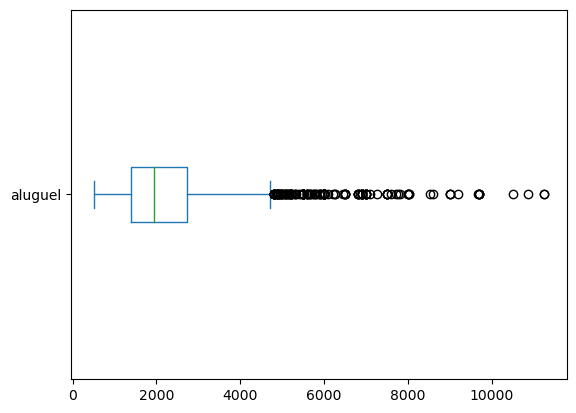

In [97]:
# Uma outra forma de apresentar os dados
dados.aluguel.plot.box(vert=False)

In [101]:
# Verificando as 10 propriedades de maior valor
dados.sort_values('aluguel', ascending=False).head(10)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
235,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
1402,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
255,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0


In [102]:
# Verificar se tem valores duplicados na base
dados[dados.duplicated()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
77,Barra Funda,1060.0,287.0,0.0,14.0,21.0,1382.0,50.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
176,Belém,1200.0,200.0,20.0,20.0,24.0,1464.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
250,Belém,1200.0,200.0,20.0,20.0,24.0,1464.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
267,Paraíso,3400.0,1372.0,360.0,44.0,68.0,5244.0,147.0,3.0,3.0,1.0,4.0,1.0,0.0,1.0
306,Perdizes,2150.0,0.0,0.0,28.0,43.0,2221.0,72.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,Vila Nova Conceição,3090.0,900.0,184.0,40.0,61.0,4275.0,85.0,2.0,2.0,1.0,12.0,1.0,0.0,0.0
2770,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
2771,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0
2773,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0


In [103]:
# Elimando valores duplicados
dados = dados.drop_duplicates(keep='last')

In [104]:
# Verificando novamente a base
# Verificando as 10 propriedades de maior valor
dados.sort_values('aluguel', ascending=False).head(10)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0
1505,Jardim Paulista,9000.0,2480.0,496.0,115.0,180.0,12270.0,160.0,3.0,4.0,1.0,7.0,1.0,0.0,1.0
2047,Vila Olímpia,8999.0,2300.0,616.0,115.0,179.0,12210.0,128.0,3.0,3.0,2.0,2.0,1.0,0.0,0.0
680,Jardim Paulista,8990.0,1362.0,352.0,114.0,179.0,11000.0,140.0,2.0,3.0,1.0,19.0,1.0,0.0,1.0


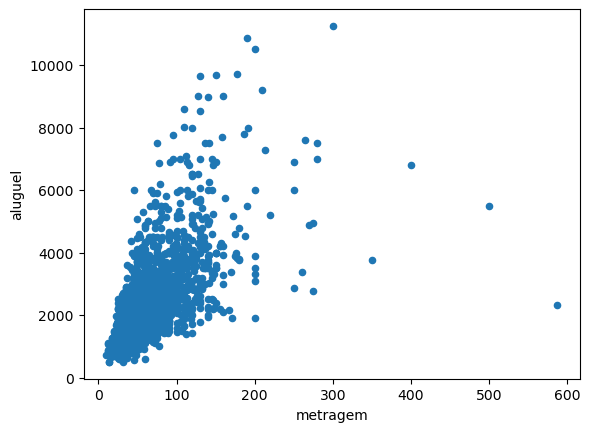

In [138]:
#Será que existe relação entre aluguel e metragem?
dados.plot.scatter(x='metragem', y='aluguel');

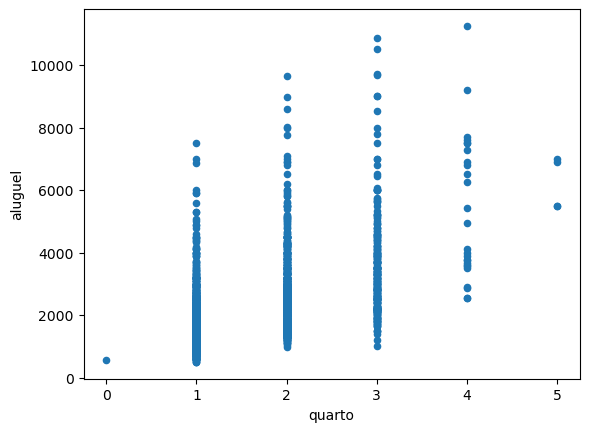

In [111]:
#Será que existe relação entre aluguel e quartos?
dados.plot.scatter(x='quarto', y='aluguel');

## Uso do seaborn

In [153]:
# Importando seaborn
import seaborn as sns

<AxesSubplot:xlabel='metro_prox', ylabel='aluguel'>

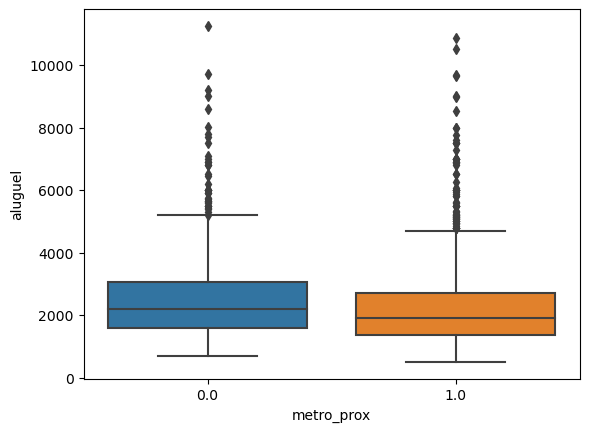

In [115]:
# Qual será a média do aluguel entre propriedades próximas e distantes do metrô?
sns.boxplot(x='metro_prox',y='aluguel',data=dados)

<AxesSubplot:xlabel='aluguel', ylabel='bairro'>

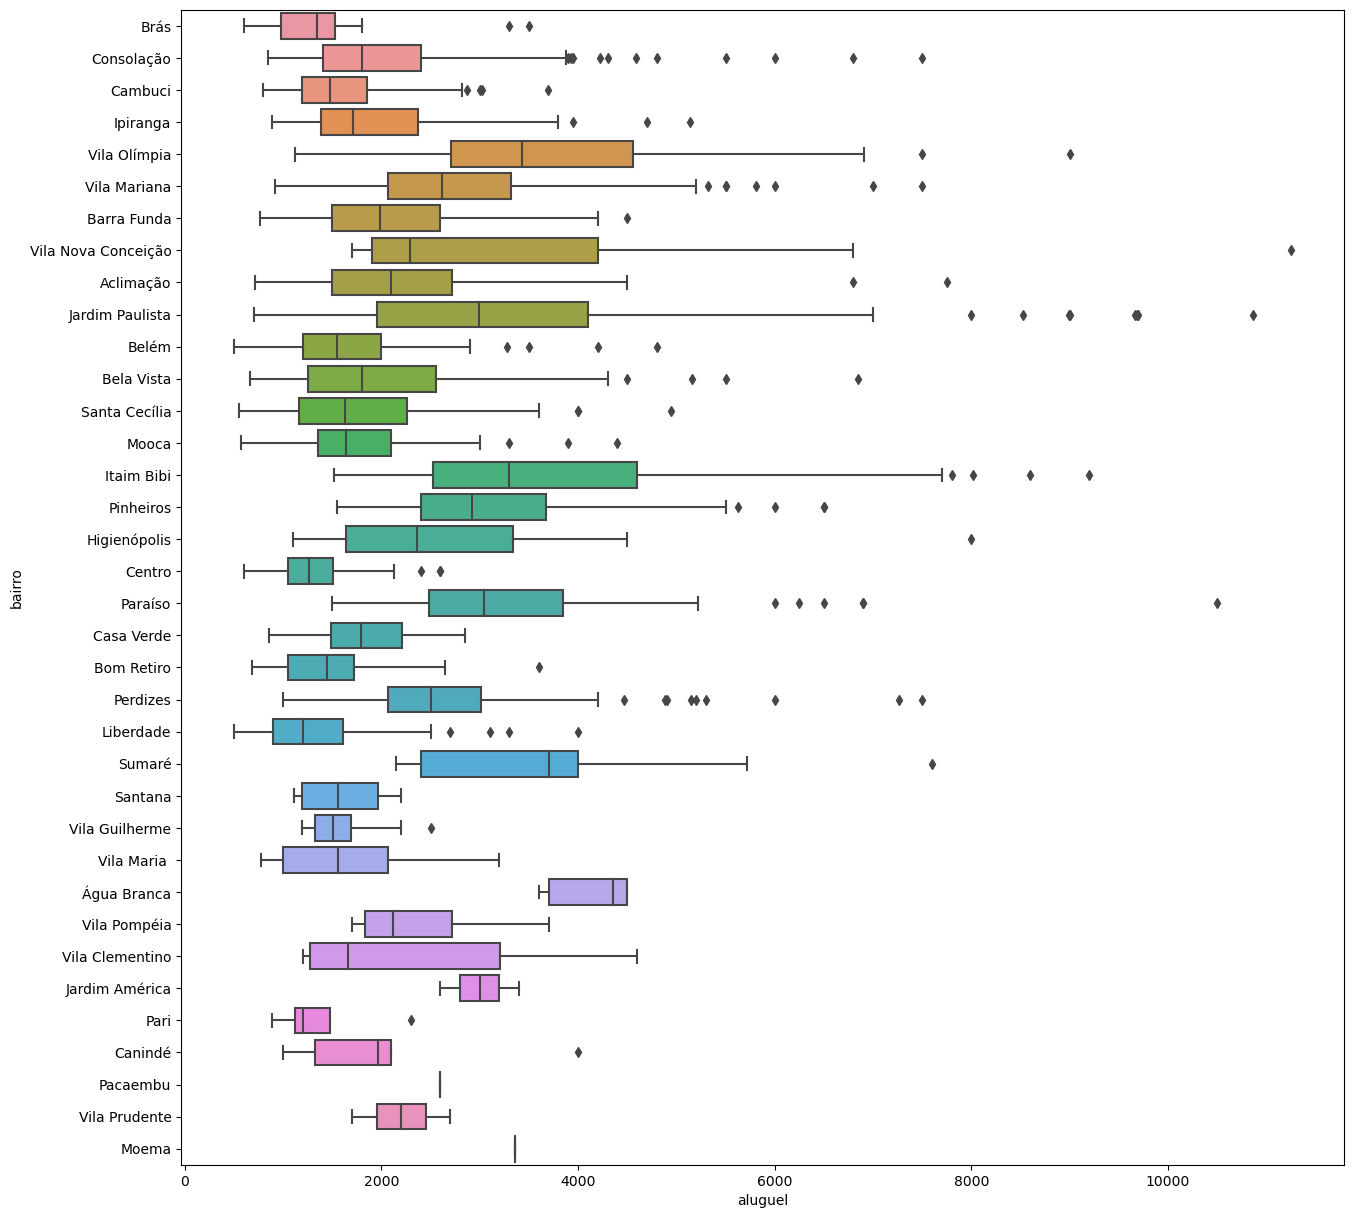

In [118]:
# Podemos avaliar o bairro
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(x='aluguel',y='bairro',data=dados, orient='h')

In [120]:
# Verificando a quantidade de registros em cada bairro
dados.bairro.value_counts()

Consolação             271
Jardim Paulista        190
Bela Vista             187
Santa Cecília          178
Pinheiros              117
Vila Mariana           114
Mooca                   99
Itaim Bibi              87
Cambuci                 86
Liberdade               86
Perdizes                84
Centro                  80
Aclimação               75
Paraíso                 59
Ipiranga                55
Barra Funda             53
Bom Retiro              51
Belém                   35
Brás                    29
Vila Olímpia            29
Higienópolis            28
Casa Verde              24
Vila Guilherme          18
Vila Nova Conceição     14
Vila Pompéia            14
Vila Clementino         10
Sumaré                   9
Santana                  8
Canindé                  6
Vila Maria               6
Água Branca              5
Pari                     4
Jardim América           2
Vila Prudente            2
Pacaembu                 1
Moema                    1
Name: bairro, dtype: int64

In [122]:
# Importando uma base de bairros x regiões
regioes = pd.read_excel('bairros.xlsx')
display(regioes)

,Bairro,Região
0,Sé,Centro
1,Bela Vista,Centro
2,Bom Retiro,Centro
3,Cambuci,Centro
4,Consolação,Centro
...,...,...
108,Vila Clementino,Sul
109,Canindé,Centro
110,Água Branca,Oeste
111,Jardim América,Oeste


In [123]:
#Unindo essas duas base de dados
base2 = pd.merge(
 dados,
 regioes,
 how='left',
 left_on='bairro',right_on='Bairro'
)

In [124]:
base2.head(3)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Brás,600.0,450.0,14.0,8.0,12.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste
1,Consolação,1790.0,598.0,10.0,23.0,35.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro
2,Cambuci,1550.0,1.0,28.0,26.0,31.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro


In [127]:
# Filtrando os valores onde a Região é nula
base2[base2.Região.isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
234,Vila Maria,3200.0,680.0,68.0,41.0,64.0,4053.0,80.0,2.0,2.0,1.0,7.0,1.0,0.0,0.0,NaN,NaN
820,Vila Maria,850.0,0.0,42.0,15.0,17.0,924.0,40.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
1262,Vila Maria,1460.0,220.0,106.0,19.0,29.0,1834.0,70.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
1684,Vila Maria,2200.0,653.0,172.0,28.0,44.0,3097.0,79.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
1845,Vila Maria,1657.0,1050.0,291.0,21.0,33.0,3052.0,110.0,2.0,3.0,2.0,4.0,1.0,0.0,0.0,NaN,NaN
2227,Vila Maria,772.0,0.0,100.0,13.0,15.0,900.0,45.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN


In [128]:
# Verificando se existe Vila Maria na base que importamos
regioes[regioes.Bairro == 'Vila Maria']

,Bairro,Região
58,Vila Maria,Norte


In [129]:
# Verificando na base 2 apenas o bairro
base2.loc[base2.Região.isnull(),'bairro']

234     Vila Maria 
820     Vila Maria 
1262    Vila Maria 
1684    Vila Maria 
1845    Vila Maria 
2227    Vila Maria 
Name: bairro, dtype: object

In [130]:
# Adicionando a região de Vila Maria a Norte
base2.loc[base2.Região.isnull(),'Região'] = 'Norte'

In [132]:
# Corrigindo o nome de Vila Maria
base2.loc[base2.bairro == 'Vila Maria ','bairro'] = 'Vila Maria'

In [134]:
# Verificando novamente se existe algum valor nulo
base2[base2.Região.isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região


<AxesSubplot:xlabel='aluguel', ylabel='Região'>

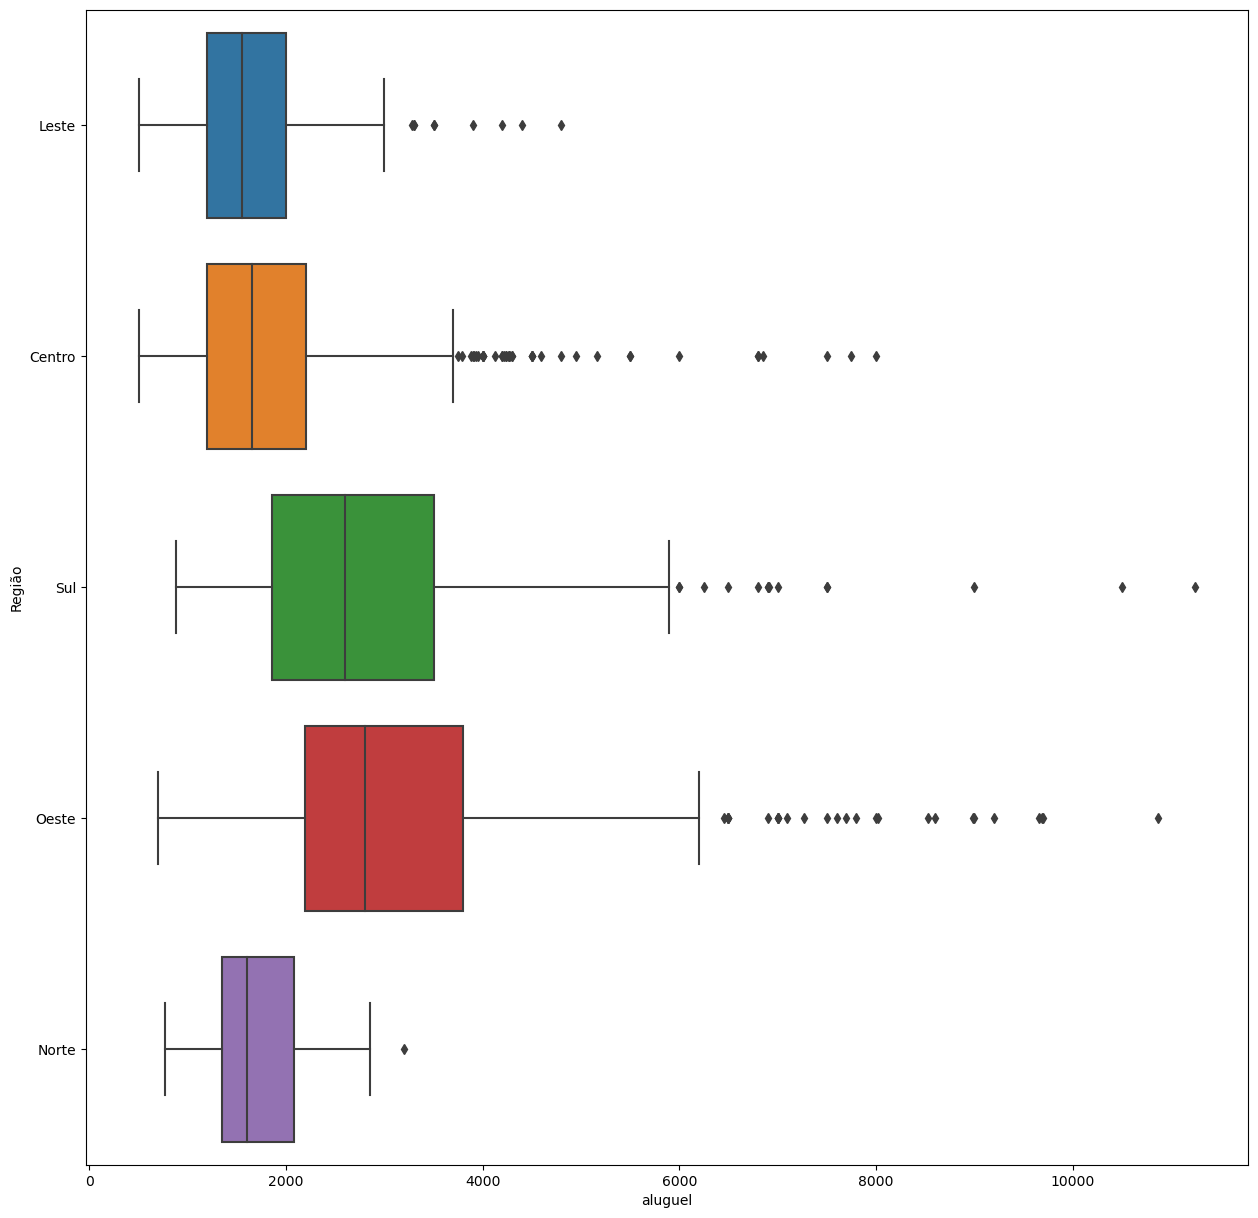

In [135]:
# Agora podemos traçar o gráfico por região
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(x='aluguel',y='Região',data=base2, orient='h')

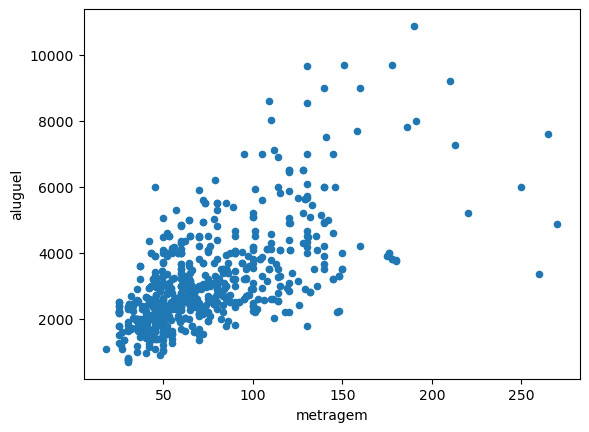

In [137]:
#Será que existe relação entre aluguel e metragem para a região oeste?
base2[base2.Região == 'Oeste'].plot.scatter(x='metragem', y='aluguel');

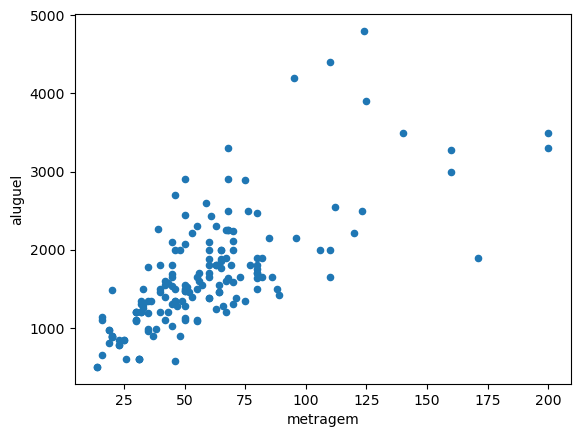

In [139]:
#Será que existe relação entre aluguel e metragem para a região leste?
base2[base2.Região == 'Leste'].plot.scatter(x='metragem', y='aluguel');

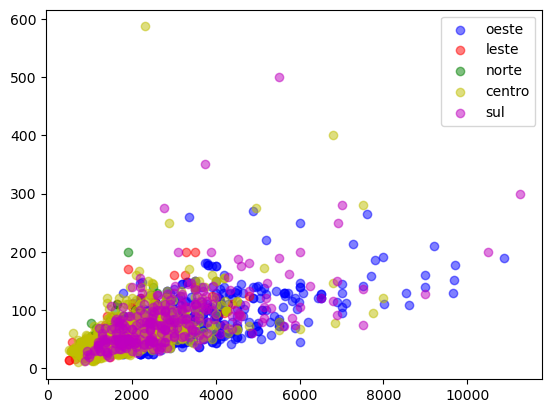

In [144]:
# Criando um gráfico geral de todas regiões
fig, ax = plt.subplots()

oeste = base2[base2.Região == 'Oeste']
leste = base2[base2.Região == 'Leste']
norte = base2[base2.Região == 'Norte']
centro = base2[base2.Região == 'Centro']
sul = base2[base2.Região == 'Sul']

ax.scatter(oeste.aluguel, oeste.metragem, c='b',alpha=0.5, label='oeste')
ax.scatter(leste.aluguel, leste.metragem, c='r',alpha=0.5, label='leste')
ax.scatter(norte.aluguel, norte.metragem, c='g',alpha=0.5, label='norte')
ax.scatter(centro.aluguel, centro.metragem, c='y',alpha=0.5, label='centro')
ax.scatter(sul.aluguel, sul.metragem, c='m',alpha=0.5, label='sul')

ax.legend()

plt.show()

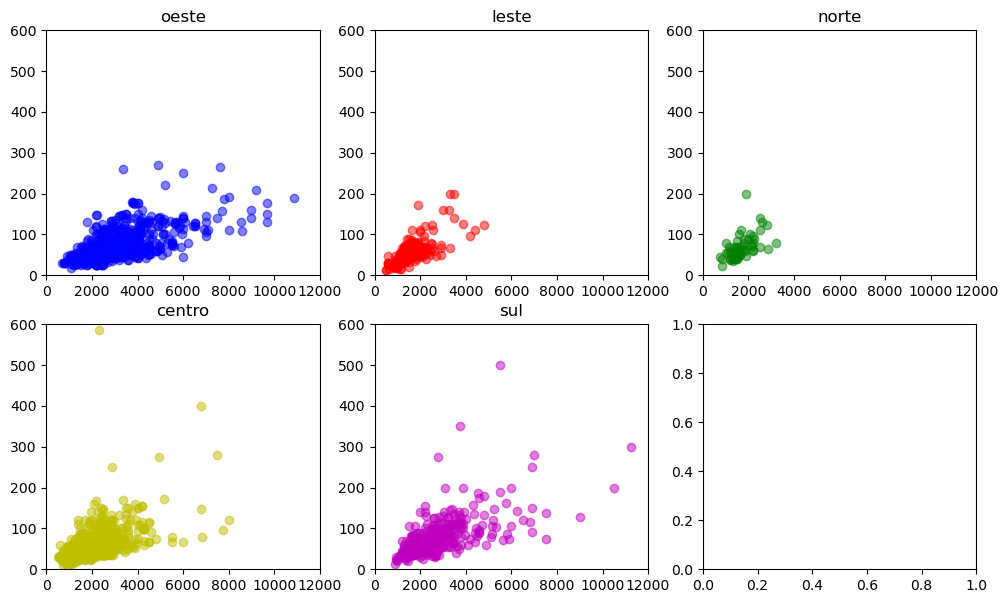

In [148]:
# Criando um gráfico para cada região
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(12,7))

oeste = base2[base2.Região == 'Oeste']
leste = base2[base2.Região == 'Leste']
norte = base2[base2.Região == 'Norte']
centro = base2[base2.Região == 'Centro']
sul = base2[base2.Região == 'Sul']

ax[0,0].scatter(oeste.aluguel, oeste.metragem, c='b',alpha=0.5, label='oeste')
ax[0,1].scatter(leste.aluguel, leste.metragem, c='r',alpha=0.5, label='leste')
ax[0,2].scatter(norte.aluguel, norte.metragem, c='g',alpha=0.5, label='norte')
ax[1,0].scatter(centro.aluguel, centro.metragem, c='y',alpha=0.5, label='centro')
ax[1,1].scatter(sul.aluguel, sul.metragem, c='m',alpha=0.5, label='sul')

ax[0,0].set(xlim=(0, 12000),ylim=(0, 600))
ax[0,1].set(xlim=(0, 12000),ylim=(0, 600))
ax[0,2].set(xlim=(0, 12000),ylim=(0, 600))
ax[1,0].set(xlim=(0, 12000),ylim=(0, 600))
ax[1,1].set(xlim=(0, 12000),ylim=(0, 600))

ax[0,0].set_title('oeste')
ax[0,1].set_title('leste')
ax[0,2].set_title('norte')
ax[1,0].set_title('centro')
ax[1,1].set_title('sul')

plt.show()

**Existe alguma relação entre as variáveis**

In [149]:
# Verificando se há correlação da base de dados
base2.corr()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
aluguel,1.000000,0.547477,0.028619,0.986592,0.999937,0.180066,0.625594,0.536307,0.645005,0.566189,0.117477,0.090506,0.195236,-0.107808
condominio,0.547477,1.000000,-0.022161,0.478443,0.547217,0.089427,0.410019,0.414734,0.523017,0.566976,0.242036,0.064668,0.115346,0.000910
iptu,0.028619,-0.022161,1.000000,0.043838,0.028759,0.987828,0.054086,0.073957,0.056725,-0.011616,-0.025528,0.012266,-0.010007,0.010633
seguro_incendio,0.986592,0.478443,0.043838,1.000000,0.986566,0.190569,0.662295,0.551111,0.642922,0.559802,0.072388,0.092343,0.181506,-0.122333
taxa_serviço,0.999937,0.547217,0.028759,0.986566,1.000000,0.180184,0.625697,0.536624,0.644766,0.566322,0.117122,0.091285,0.194803,-0.108255
total,0.180066,0.089427,0.987828,0.190569,0.180184,1.000000,0.151059,0.159203,0.160734,0.085004,-0.000086,0.026351,0.020175,-0.003480
metragem,0.625594,0.410019,0.054086,0.662295,0.625697,0.151059,1.000000,0.725122,0.665260,0.448426,-0.060388,0.139389,-0.054571,-0.152064
quarto,0.536307,0.414734,0.073957,0.551111,0.536624,0.159203,0.725122,1.000000,0.663906,0.445602,-0.021817,0.119335,-0.100762,-0.200685
banheiro,0.645005,0.523017,0.056725,0.642922,0.644766,0.160734,0.665260,0.663906,1.000000,0.516650,0.044936,0.070850,-0.014080,-0.142516
vaga_carro,0.566189,0.566976,-0.011616,0.559802,0.566322,0.085004,0.448426,0.445602,0.516650,1.000000,0.193923,0.064124,0.111359,-0.144232


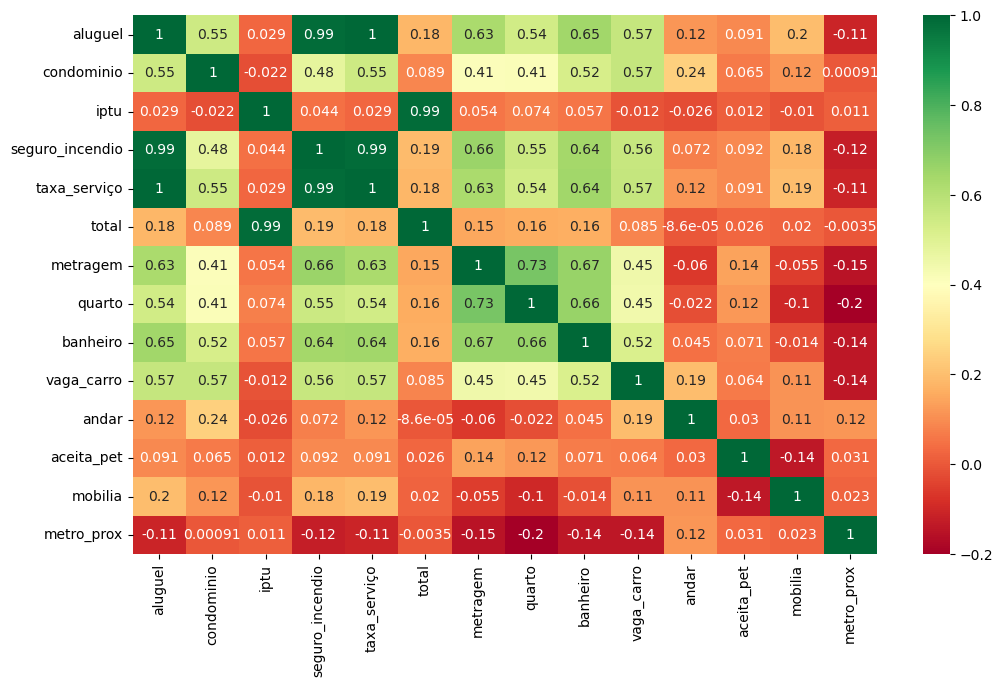

In [155]:
# Tornando a correlação mais visual usando o seaborn
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(base2.corr(), annot=True, cmap='RdYlGn')
plt.show()

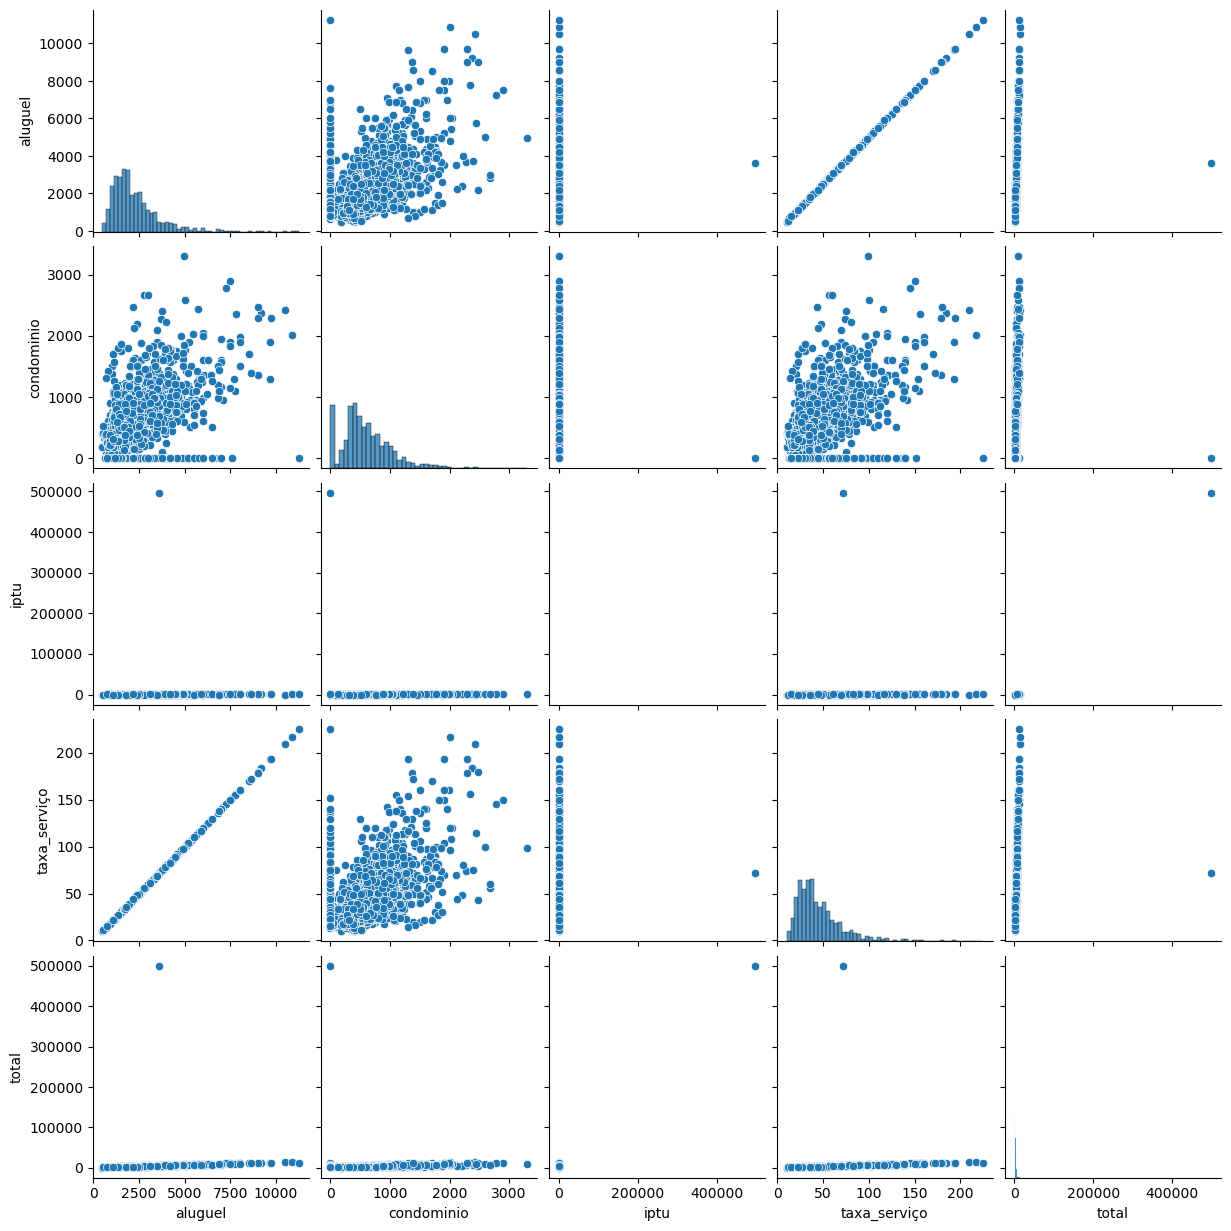

In [158]:
# Podemos verificar graficamente a relação entre algumas variáveis
base3 = dados[['aluguel', 'condominio', 'iptu', 'taxa_serviço','total']]
sns.pairplot(base3);

In [160]:
# Verificandp o outlier do total
dados.total.max()

499600.0

In [162]:
# Filtrando essa linha da base de dados
dados[dados.total == dados.total.max()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
1707,Santa Cecília,3600.0,0.0,495800.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0


In [164]:
# Importando a base de dados novamente para verificar a informação
verificar = pd.read_csv('quinto_andar_transformed_data.csv')

In [166]:
# Encontrando o valor de maior iptu
verificar[verificar.iptu == verificar.iptu.max()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
1707,https://www.quintoandar.com.br/imovel/89337922...,Santa Cecília,3600.0,0.0,495800.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0


In [167]:
# Tratando o valor errado
verificar.url[1707]

'https://www.quintoandar.com.br/imovel/893379229?house_tags=newAd&search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A2561%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

In [169]:
# Trocando o valor errado pelo correto
dados.loc[dados.iptu == dados.iptu.max(), 'iptu'] = 495.8

In [170]:
dados.loc[dados.total == dados.total.max(), 'total'] = 4227.8

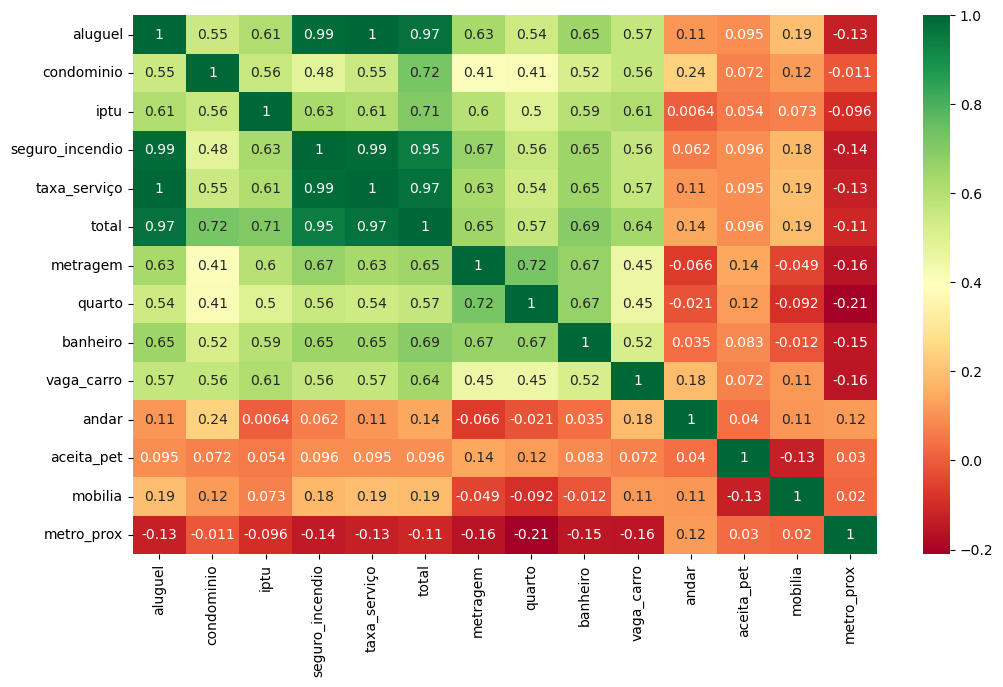

In [173]:
#Fazendo novmamente
# Tornando a correlação mais visual usando o seaborn
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(dados.corr(), annot=True, cmap='RdYlGn')
plt.show()

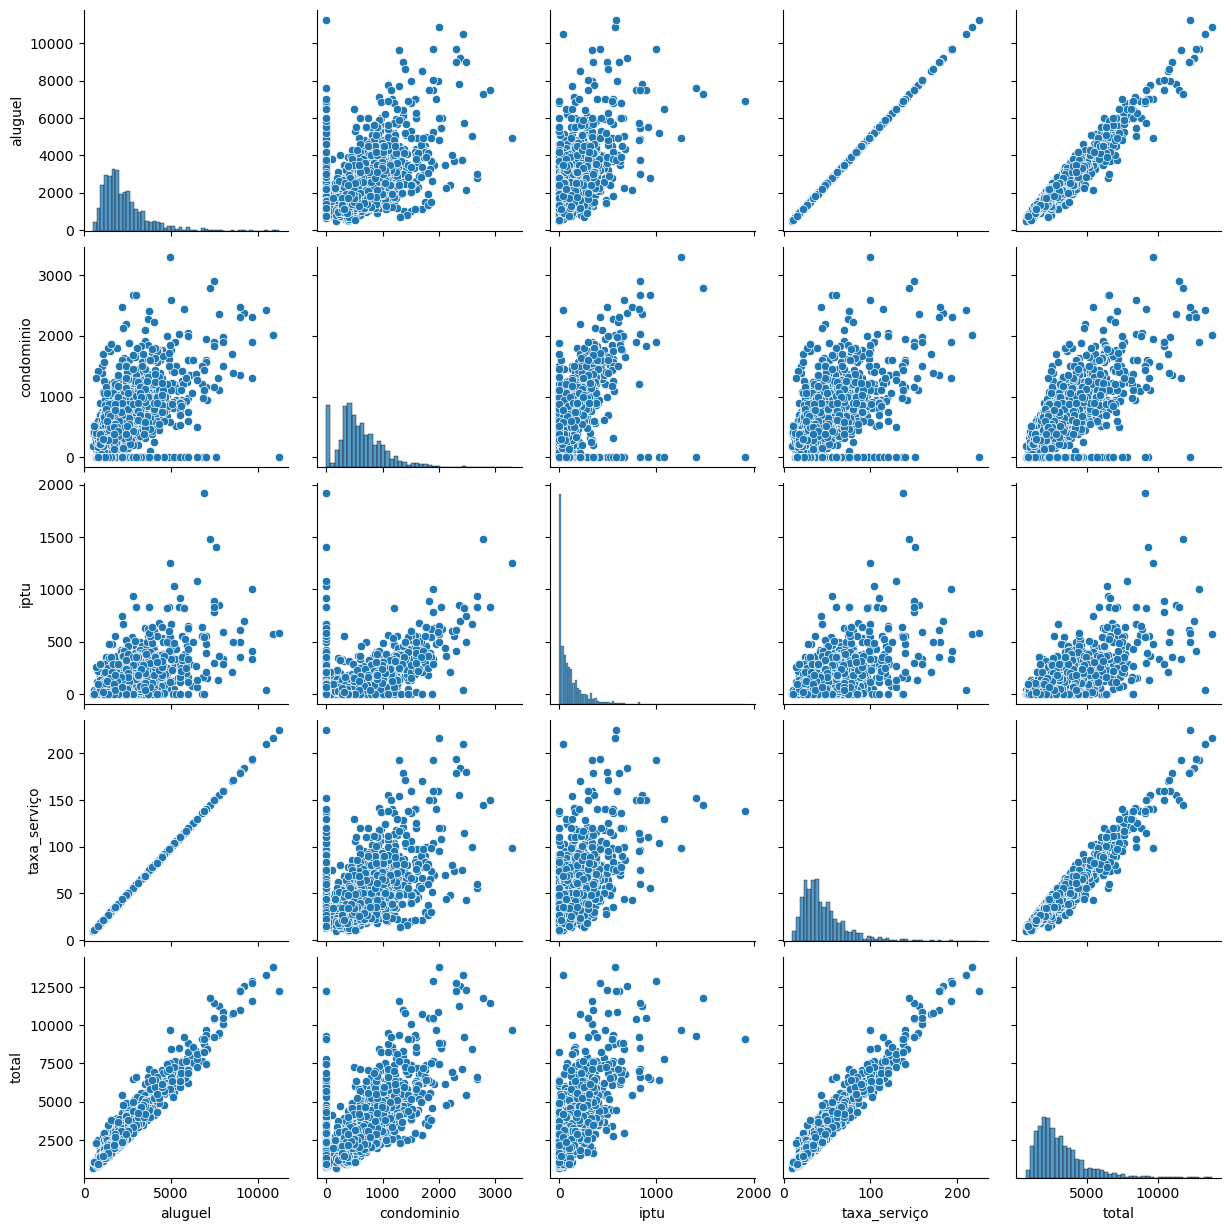

In [174]:
# Fazendo novamente
# Podemos verificar graficamente a relação entre algumas variáveis
base3 = dados[['aluguel', 'condominio', 'iptu', 'taxa_serviço','total']]
sns.pairplot(base3);

# TRATAMENTO DE DADOS

In [222]:
# Visualizando novamente a base de dados
dados = base2
dados.head(3)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região,taxa_ser,taxa_inc
0,Brás,600.0,450.0,14.0,8.0,12.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste,2.00,1.33
1,Consolação,1790.0,598.0,10.0,23.0,35.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro,1.96,1.28
2,Cambuci,1550.0,1.0,28.0,26.0,31.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro,2.00,1.68


In [223]:
# Verificando a taxa de serviço
dados['taxa_ser'] = round((dados.taxa_serviço/dados.aluguel)*100,2)

In [224]:
# Contando os valores
dados.taxa_ser.value_counts()

2.00    1374
1.99     206
1.98     203
1.96     130
1.97     129
1.95      49
1.93      48
1.94      45
1.92      19
1.91      10
1.90       9
1.88       5
2.01       2
2.02       2
2.07       1
1.89       1
2.03       1
Name: taxa_ser, dtype: int64

In [225]:
# Verificando o mesmo para seguro incêndio
dados['taxa_inc'] = round((dados.seguro_incendio/dados.aluguel)*100,2)

In [184]:
# Contando os valores
dados.taxa_inc.value_counts()

1.29    412
1.28    396
1.27    395
1.30    276
1.31    190
1.33    147
1.32     83
1.34     37
1.67     31
1.68     28
1.35     15
1.66     15
1.37     15
1.36     14
1.70     11
1.69     10
1.38     10
1.65      6
1.39      4
1.71      4
1.41      4
1.75      3
1.40      3
1.74      1
1.76      1
0.66      1
0.29      1
1.85      1
1.23      1
0.48      1
1.43      1
Name: taxa_inc, dtype: int64

A taxa de serviço e o seguro incêndio são percentuais do aluguel, então para ter a taxa é necessário primeiro ter o valor do aluguel.
Da mesma forma o total também é a soma dos valores já apresentados então colocar o total seria repetir informação.

In [226]:
# Podemos então apagar essa coluna e a coluna que calculamos o percentual
dados = dados.drop(['taxa_serviço', 'taxa_ser', 'seguro_incendio','taxa_inc','total'], axis=1)

In [227]:
# Fazendo a mesma lógica para o Iptu
dados['taxa_iptu'] = round((dados.iptu/dados.aluguel),2)

In [192]:
# Contando os valores
dados.taxa_iptu.value_counts()

0.00    655
0.03    212
0.04    181
0.05    173
0.06    158
0.02    157
0.07    121
0.01    107
0.08     78
0.09     61
0.10     50
0.11     30
0.12     23
0.13     21
0.14     15
0.18     13
0.17     12
0.15     11
0.16      9
0.20      5
0.19      5
0.28      4
0.23      2
0.26      2
0.30      2
0.31      2
0.21      1
0.24      1
0.25      1
0.34      1
0.22      1
0.33      1
0.35      1
0.36      1
Name: taxa_iptu, dtype: int64

In [228]:
# Mantemos a coluna de iptu, mas retiramos a taxa que usamos para comparar
dados = dados.drop('taxa_iptu', axis=1)

In [230]:
# Buscando e verificando a base novamente
dados.head(3)

,bairro,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Brás,600.0,450.0,14.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste
1,Consolação,1790.0,598.0,10.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro
2,Cambuci,1550.0,1.0,28.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro


In [216]:
# Verificando as informações da base
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 2233
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bairro      2234 non-null   object 
 1   aluguel     2234 non-null   float64
 2   condominio  2234 non-null   float64
 3   iptu        2234 non-null   float64
 4   total       2234 non-null   float64
 5   metragem    2234 non-null   float64
 6   quarto      2234 non-null   float64
 7   banheiro    2234 non-null   float64
 8   vaga_carro  2234 non-null   float64
 9   andar       2234 non-null   float64
 10  aceita_pet  2234 non-null   float64
 11  mobilia     2234 non-null   float64
 12  metro_prox  2234 non-null   float64
 13  Bairro      2228 non-null   object 
 14  Região      2234 non-null   object 
 15  taxa_iptu   2234 non-null   float64
dtypes: float64(13), object(3)
memory usage: 296.7+ KB


In [232]:
# Apagando a coluna bairro
dados = dados.drop(['bairro','Bairro'], axis=1)

KeyError: "['bairro', 'Bairro'] not found in axis"

In [233]:
# Utilizando o get_dummies
pd.get_dummies(dados.Região)

,Centro,Leste,Norte,Oeste,Sul
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
2229,1,0,0,0,0
2230,1,0,0,0,0
2231,0,1,0,0,0
2232,1,0,0,0,0


In [234]:
# Utilizando o concat
dados = pd.concat([dados,pd.get_dummies(dados.Região)], axis=1)

In [235]:
dados.head()

,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Região,Centro,Leste,Norte,Oeste,Sul
0,600.0,450.0,14.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Leste,0,1,0,0,0
1,1790.0,598.0,10.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Centro,1,0,0,0,0
2,1550.0,1.0,28.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Centro,1,0,0,0,0
3,1600.0,0.0,142.0,50.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,Sul,0,0,0,0,1
4,1700.0,1106.0,218.0,74.0,2.0,2.0,1.0,11.0,1.0,0.0,0.0,Sul,0,0,0,0,1


In [236]:
# Podemos então apagar a única variável que está como texto
dados = dados.drop('Região', axis=1)

**Voltamos nesse processo sempre que necessário durante a criação do modelo!**

#  Definição de modelo

**Aprendizado Supervisionado**: temos exemplos com resultados(rótulos/labels), do que queremos prever.

- **Regressão**: Prever um valor numérico contínuo
 - Exemplo: Prever o valor de uma casa, do aluguel, a quantidade de vendas...
 
- **Classificação**: Prever uma classe
 - Exemplo: Prever se a fruta é banana ou maçã, se uma transação é fraude, se a pessoa possuí ou não uma doença...
 
- Se não temos os valores dos resultados e queremos descobrir apenas estruturas padrões semelhantes, temos um problema de **aprendizado não supervisionado**.
 - Exemplo: Agrupar clientes, definir cesta de produtos, agrupar frutas sem saber qual é a maça ou banana...
 

**Antes de definir o modelo, o primeiro passo é separar os nossos dados em treino e teste**

Esta etapa é extremamente importante  pois vamos precisar **avaliar a qualidade do nosso modelo**

**Vamos utilizar o train_test_split do próprio Scikit_Learn**

In [240]:
# Primeiramente vamos separar o que são nossas variáveis preditoras(x, que vamos usar para fazer) e a variável alvo(que queremos prever, o y)
base = dados
x = base.drop('aluguel', axis=1)
y = base.aluguel

In [239]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [243]:
x_train.head(3)

,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Centro,Leste,Norte,Oeste,Sul
425,320.0,0.0,30.0,1.0,1.0,0.0,3.0,1.0,0.0,1.0,1,0,0,0,0
2168,212.0,27.0,35.0,1.0,1.0,0.0,4.0,0.0,0.0,1.0,1,0,0,0,0
780,430.0,0.0,30.0,1.0,1.0,0.0,15.0,0.0,1.0,1.0,1,0,0,0,0


### Depois de separar a base de treino e teste, podemos usar a base de treino para criar nosso modelo usando diferentes algoritmos

**Usando Regressão linear**

In [245]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [246]:
# Treinando o nosso modelo
reg = LinearRegression().fit(x_train, y_train)

In [247]:
# Avaliando o ajuste do modelo aos dados de Treino
reg.score(x_train, y_train)

0.6523220010441098

In [248]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [249]:
# Fazendo a previsão com o modelo anterior
y_pred = reg.predict(x_test)

In [251]:
# Avaliando o erro para a regressão linear
mean_absolute_error(y_test, y_pred)

542.7771493866187

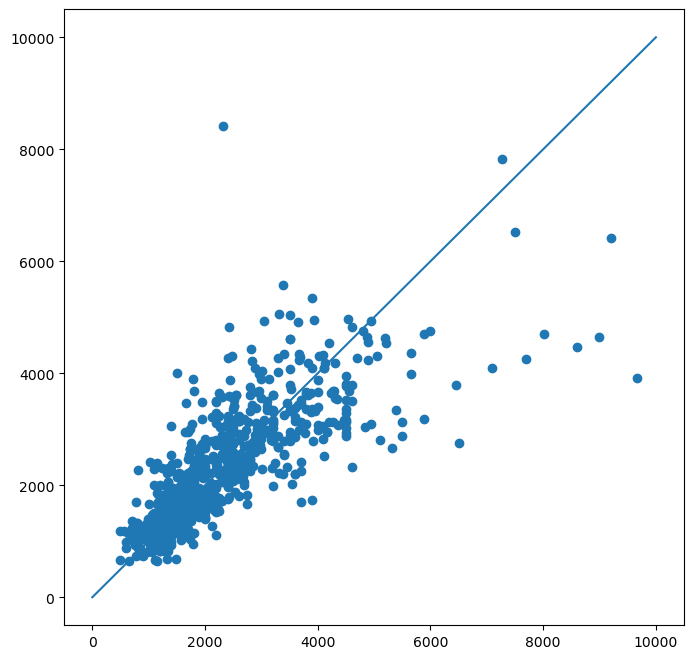

In [255]:
# Visualizando a diferença graficamente

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(y_test, y_pred)
ax.plot([0,10000],[0,10000])

plt.show()

In [257]:
# Importando a árvore de decisão
from sklearn import tree

In [258]:
# Criando o regressor
regtree = tree.DecisionTreeRegressor()

In [259]:
# Fazendo o fit do modelo
regtree = regtree.fit(x_train, y_train)

In [260]:
# Avaliando o ajuste do modelo aos dados de Treino
regtree.score(x_train, y_train)

0.9999982457122238

In [261]:
# Fazendo a previsão
y_predtree = regtree.predict(x_test)

In [262]:
# Avaliando o erro para árvore de decisão
mean_absolute_error(y_test, y_predtree)

674.3617886178862

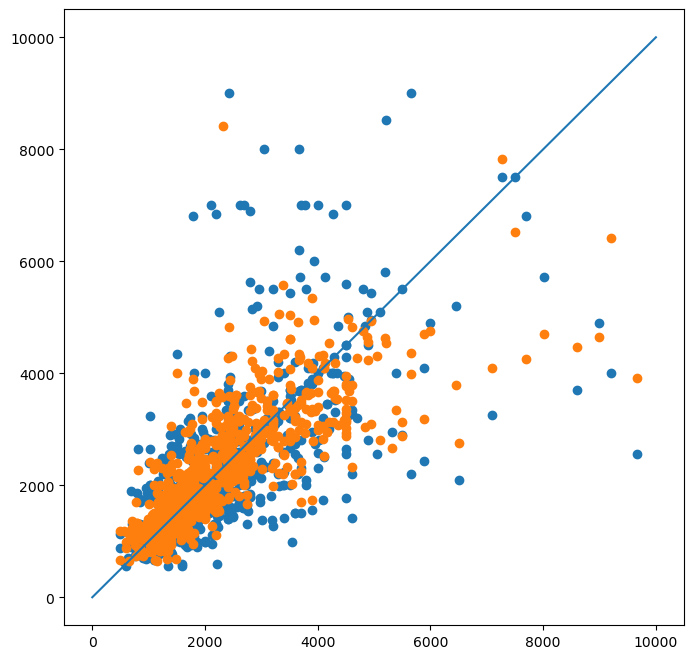

In [264]:
# Visualizando a diferença graficamente

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(y_test, y_predtree)
ax.scatter(y_test, y_pred)
ax.plot([0,10000],[0,10000])

plt.show()

In [265]:
# Importando o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [266]:
# Avaliando para regressão
mean_squared_error(y_test, y_pred)

675373.4014796574

In [267]:
# Avaliando para árvore
mean_squared_error(y_test, y_predtree)

1233893.419000301

**Tentando criar uma nova árvore de decisão**

In [309]:
# Criando uma nova árvore de decisão
regtree2 = tree.DecisionTreeRegressor(random_state=20,criterion='absolute_error', max_depth=5)

In [310]:
# Fazendo o fit do modelo
regtree2 = regtree2.fit(x_train, y_train)

In [311]:
# Fazendo a previsão
y_predtree2 = regtree2.predict(x_test)

In [312]:
# Avaliando o erro para árvore de decisão
mean_absolute_error(y_test, y_predtree2)

560.0088075880759

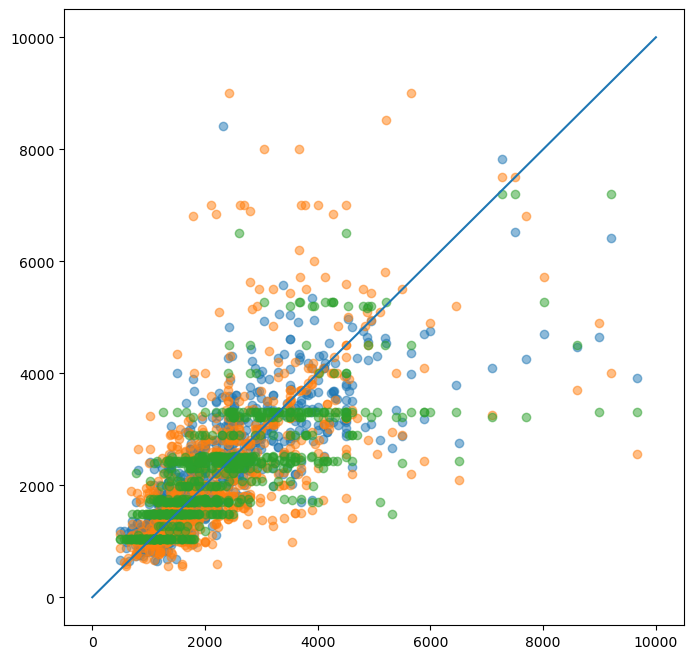

In [313]:
# Visualizando a diferença graficamente

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(y_test, y_pred, alpha=0.5)
ax.scatter(y_test, y_predtree, alpha=0.5)
ax.scatter(y_test, y_predtree2, alpha=0.5)

ax.plot([0,10000],[0,10000])

plt.show()

In [314]:
# Utilizando o SUPPORT VECTOR REGRESSION
from sklearn.svm import SVR

In [315]:
# Fazendo a previsão
regsvr = SVR()
regsvr = regsvr.fit(x_train, y_train)
y_predsvr = regsvr.predict(x_test)
mean_absolute_error(y_test, y_predsvr)

916.6559671882948

In [317]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

In [1]:
# Treinando o modelo
regr = RandomForestRegressor(max_depth=50, random_state=0)
regr.fit(x_train, y_train)
y_predRF = regr.predict(x_test)
mean_absolute_error(y_test, y_predRF)

NameError: name 'RandomForestRegressor' is not defined

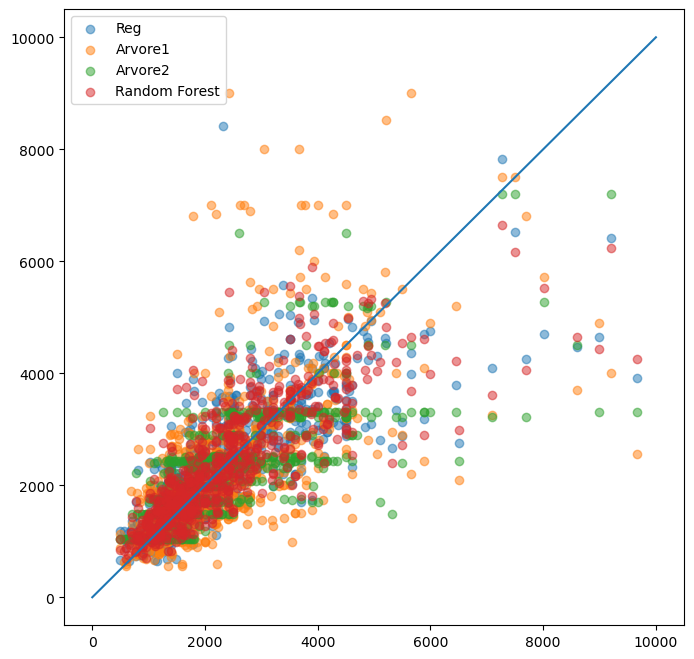

In [345]:
# Visualizando a diferença graficamente

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(y_test, y_pred, alpha=0.5, label='Reg')
ax.scatter(y_test, y_predtree, alpha=0.5, label='Arvore1')
ax.scatter(y_test, y_predtree2, alpha=0.5, label='Arvore2')
ax.scatter(y_test, y_predRF, alpha=0.5, label='Random Forest')

ax.plot([0,10000],[0,10000])

ax.legend()

plt.show()

# Modelo em produção

Persistir o modelo

In [347]:
# Importando o dump do joblib
from joblib import dump

In [348]:
# Fazendo o dump do modelo que queremos usar
dump(regr, 'regressor.joblib')

['regressor.joblib']

In [350]:
x_test.columns

Index(['condominio', 'iptu', 'metragem', 'quarto', 'banheiro', 'vaga_carro',
       'andar', 'aceita_pet', 'mobilia', 'metro_prox', 'Centro', 'Leste',
       'Norte', 'Oeste', 'Sul'],
      dtype='object')